# Magnum Python Task
### Author: Ayan Ashkenov
### Date: 15/05/2021

# -----------------------------------

## Imports and settings

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import LocalOutlierFactor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, balanced_accuracy_score
from sklearn import tree

pd.set_option('display.max_columns', None)

# -----------------------------------

## Load data

In [2]:
bank_customers: pd.DataFrame = pd.read_csv('/Users/ayan/Desktop/bank_customers.csv')
bank_customers.head()

,CLIENTNUM,Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,0,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,0,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,0,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,0,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,0,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


# -----------------------------------

## Data exploration
#### Let's first look at the shape of our data and glance through some general statistics for each column.
Here we have 10,127 rows and 21 columns.

In [3]:
bank_customers.shape

(10127, 21)

The describe() function gives us a quick, raw overview of our data. 

In [4]:
bank_customers.describe()

,CLIENTNUM,Flag,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,0.160660,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,0.367235,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,0.000000,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,0.000000,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,0.000000,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,0.000000,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,1.000000,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


# -----------------------------------

#### There are quite a few categorical features in our data. Let's look at them closer.
As we can see, out of 10,127 customers, 8,500 are existing customers and 1,627 no longer hold accounts.  
Our classification model will aim to predict if a customer is with the bank or not based on our data, but  
more on that later.

In [5]:
bank_customers['Flag'].value_counts()

0    8500
1    1627
Name: Flag, dtype: int64

#### Now, let's explore the distribution of marital status, education level, and income of the bank's customers.
For this purpose, we will use a pie chart. It is nice and simple, but most importantly, very informative in this case.  
As we can clearly see, the vast majority of people are either married or single. However, we do also have a substantial  
quantity of unknown cases. These will likely be removed during data cleaning, but more on that later.  
  
Note: numbers inside pie parts are percentages.

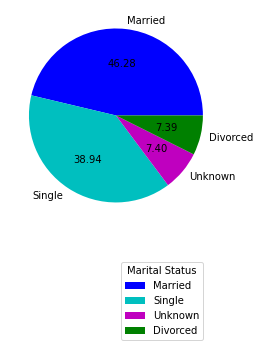

<Figure size 720x720 with 0 Axes>

In [6]:
marital_status_x: np.ndarray = bank_customers['Marital_Status'].value_counts().to_numpy()
marital_status_labels: np.ndarray = bank_customers['Marital_Status'].value_counts().index.to_numpy()
marital_status_colors: list = ['b', 'c', 'm', 'g']

plt.pie(marital_status_x, labels=marital_status_labels, 
        colors=marital_status_colors, autopct='%.2f')
plt.legend(loc=2, title='Marital Status', bbox_to_anchor=(0.5, -0.15))
plt.figure(figsize=(10,10))
plt.show()

Numerous issues here, namely that graduate, post-graduate, and doctorate can be placed into one category.  
Adding to that, an unhealthy amount of unknowns. These inconsistencies will be fixed in the cleaning stage.

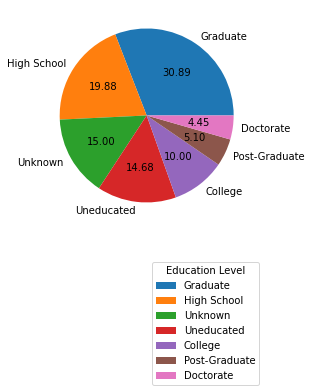

<Figure size 720x720 with 0 Axes>

In [7]:
education_level_x: np.ndarray = bank_customers['Education_Level'].value_counts().to_numpy()
education_level_labels: np.ndarray = bank_customers['Education_Level'].value_counts().index.to_numpy()

plt.pie(education_level_x, labels=education_level_labels, 
        autopct='%.2f')
plt.legend(loc=2, title='Education Level', bbox_to_anchor=(0.5, -0.15))
plt.figure(figsize=(10,10))
plt.show()

Finally, we find that over a third of the bank's customers earn less than 40,000USD a year.  
Additionally, we lack data for almost 11% of customers. It is becoming extremely evident that  
our dataset needs a lot of cleaning.

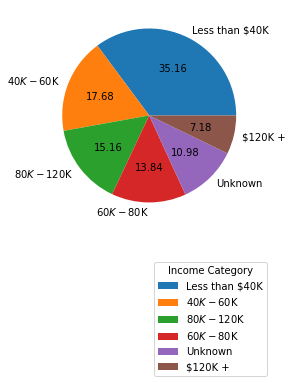

<Figure size 720x720 with 0 Axes>

In [8]:
income_category_x: np.ndarray = bank_customers['Income_Category'].value_counts().to_numpy()
income_category_labels: np.ndarray = bank_customers['Income_Category'].value_counts().index.to_numpy()

plt.pie(income_category_x, labels=income_category_labels, 
        autopct='%.2f')
plt.legend(loc=2, title='Income Category', bbox_to_anchor=(0.5, -0.15))
plt.figure(figsize=(10,10))
plt.show()

# -----------------------------------

#### It is now time to explore several quantitative variables that will likely yield some discoveries.
We will first look at the distribution of time people have spent as the bank's customers.  
The average number of months is 35.93, while the longest customers spent 56 months with the bank.

In [9]:
bank_customers['Months_on_book'].describe()

count    10127.000000
mean        35.928409
std          7.986416
min         13.000000
25%         31.000000
50%         36.000000
75%         40.000000
max         56.000000
Name: Months_on_book, dtype: float64

Surprisingly, there is little difference in account longevity between customers  
who are currently active and those that left. It may very well be that when we perform  
feature selection, the Months_on_book variable will be excluded as it will contribute 
little to our classification model.

[Text(0.5, 0, 'State of customer'),
 Text(0, 0.5, '# of months on book'),
 Text(0.5, 1.0, 'Current vs Previous Customers Longevity')]

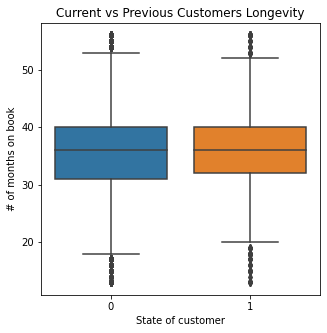

In [10]:
current_customers_subset: pd.DataFrame = bank_customers[bank_customers['Flag']==0]
previous_customers_subset: pd.DataFrame = bank_customers[bank_customers['Flag']==1]
months_on_book_current: np.ndarray = current_customers_subset['Months_on_book'].to_numpy()
months_on_book_previous: np.ndarray = previous_customers_subset['Months_on_book'].to_numpy()
plt.figure(figsize=(5,5))
sns.boxplot(data=[months_on_book_current, months_on_book_previous]).set(xlabel='State of customer', ylabel='# of months on book', title='Current vs Previous Customers Longevity')

When it comes to transactions made, however, we can see a very evident divide between current  
and previous bank customers. On the other hand, we must keep in mind that this difference is rather  
logical, since current customers have likely stayed longer, so they made more transactions.  
Regardless, this feature is likely going to play an important role in our classification model.

In [11]:
bank_customers['Total_Trans_Amt'].describe()

count    10127.000000
mean      4404.086304
std       3397.129254
min        510.000000
25%       2155.500000
50%       3899.000000
75%       4741.000000
max      18484.000000
Name: Total_Trans_Amt, dtype: float64

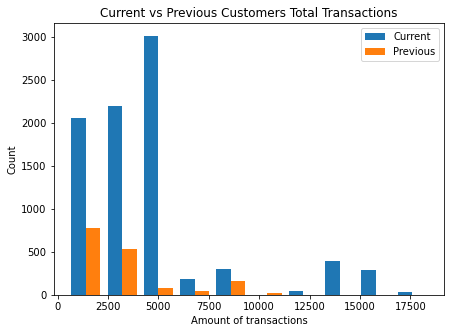

In [12]:
total_transactions_current: np.ndarray = current_customers_subset['Total_Trans_Amt'].to_numpy()
total_transactions_previous: np.ndarray = previous_customers_subset['Total_Trans_Amt'].to_numpy()

plt.figure(figsize=(7,5))
plt.hist([total_transactions_current, total_transactions_previous], label=['Current', 'Previous'], density=False)
plt.xlabel('Amount of transactions')
plt.ylabel('Count')
plt.title('Current vs Previous Customers Total Transactions')
plt.legend(loc=1)
plt.show()

# -----------------------------------

## Data Cleaning and Feature Selection
First things first, let's combine graduate, post-graduate, and doctorate categories  
in education level column into one.

In [13]:
bank_customers['Education_Level']: pd.Series = bank_customers['Education_Level'].map({
    'Graduate': 'graduate',
    'Post-Graduate': 'graduate',
    'Doctorate': 'graduate',
    'High School': 'high school',
    'College': 'bachelor',
    'Uneducated': 'uneducated',
    'Unknown': np.nan
})
bank_customers['Education_Level'].value_counts()

graduate       4095
high school    2013
uneducated     1487
bachelor       1013
Name: Education_Level, dtype: int64

Now, we will rename the income category column and remap its values to a  
more standard format.

In [14]:
bank_customers['Income_Category']: pd.Series = bank_customers['Income_Category'].map({
    'Less than $40K': 'less_than_40K',
    '$40K - $60K': '40to60K',
    '$60K - $80K': '60to80K',
    '$80K - $120K': '80to120K',
    '$120K +': 'more_than_120K',
    'Unknown': np.nan
})
bank_customers.rename(columns={'Income_Category': "Income_Category_inUSD"}, inplace=True)
bank_customers['Income_Category_inUSD'].value_counts()

less_than_40K     3561
40to60K           1790
80to120K          1535
60to80K           1402
more_than_120K     727
Name: Income_Category_inUSD, dtype: int64

At this stage, let's take care of missing values and outliers. So far, we still have 10,127 rows in our dataset.  
Let's see how many we have left after we remove all rows with at least 1 missing value. 

In [15]:
bank_customers_clean: pd.DataFrame = bank_customers.dropna()
bank_customers_clean.shape

(7641, 21)

Now, we are at 7,641 rows total. This amount of data should still be satisfactor for our  
purposes. There is only one more thing to check, and that is the distribution of our 'Flag'  
variable.

In [16]:
bank_customers_clean['Flag'].value_counts()

0    6430
1    1211
Name: Flag, dtype: int64

We still have an adequate amount of customers who left the bank and more than enough  
of those that are still banking with the institution. We will have to fix this disbalance  
before building our classification models, but more on that later.  
  
Before that, however, we must do something very important. Since we have categorical variables  
in our data, we need to quantify them. For this analysis, we will use a technique called one-hot  
encoding.

In [17]:
bank_customers_clean: pd.DataFrame = pd.get_dummies(bank_customers_clean)
bank_customers_clean.head()

,CLIENTNUM,Flag,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_F,Gender_M,Education_Level_bachelor,Education_Level_graduate,Education_Level_high school,Education_Level_uneducated,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,Income_Category_inUSD_40to60K,Income_Category_inUSD_60to80K,Income_Category_inUSD_80to120K,Income_Category_inUSD_less_than_40K,Income_Category_inUSD_more_than_120K,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,768805383,0,45,3,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0
1,818770008,0,49,5,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0
2,713982108,0,51,3,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0
3,769911858,0,40,4,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0
4,709106358,0,40,3,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0


As a result of our one-hot encoding, we now have 35 columns.

In [18]:
bank_customers_clean.shape

(7641, 35)

# -----------------------------------

## Classification Prep  
First, we will divide the data into train and test sets.  

Then, we will normalize the x_train set because our data has different units of measurement.  

Finally, we will remove outliers using the Local Outlier Factor (LOF) algorithm. It is an   
unsupervised learning technique that works by examining each data point and calculating its  
LOF score, which is based on the local reachability score of its neighbors.  

In [20]:
x_data: pd.DataFrame = bank_customers_clean.drop(['CLIENTNUM', 'Flag'], axis=1)
y_data: pd.DataFrame = pd.DataFrame(bank_customers_clean["Flag"])
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.20)

Note: when we normalize our x_train set, we must also normalize our x_test set.

In [21]:
standard_scaler = preprocessing.StandardScaler()
x_train_norm: np.ndarray = standard_scaler.fit_transform(x_train)
x_test_norm: np.ndarray = standard_scaler.fit_transform(x_test)

In [22]:
#Courtesy of Dr. Jason Brownlee
lof_model = LocalOutlierFactor()
outlier_designation: np.ndarray = lof_model.fit_predict(x_train_norm)
outlier_designation_tf: np.ndarray = outlier_designation != -1
x_train_lof, y_train_lof = x_train_norm[outlier_designation_tf, :], y_train[outlier_designation_tf]

# -----------------------------------

## Classification Model
We will use the decision tree algorithm as our classification model. Banks often use decision trees  
to select people that are qualified for loans, so it is logical to utilize a similar approach in  
this case as well. 

A decision tree starts at the root node, where it asks the first question before sending a customer  
to the left or right. Then, depending on the first question, another question is asked or the customer  
is already classified.  

To finetune our parameters, we will implement the grid search algorithm.  

Note: maximum depth for grid search was set to 33 because there are 33 features in our model and  
it was decided to keep the model as simple as possible, although it is not guaranteed that all  
33 features will be used given this depth.

In [23]:
dec_tree_model = DecisionTreeClassifier()
depth_range:list = list(range(10, 34))
min_weight_fraction_range: list = np.arange(0.0, 0.6, 0.1).tolist()
dec_tree_parameters: dict = {'max_depth': depth_range, 
              'min_weight_fraction_leaf': min_weight_fraction_range, 
              'max_features': ['auto','sqrt','log2']}
grid_search_model = GridSearchCV(dec_tree_model, dec_tree_parameters, scoring='balanced_accuracy')
grid_search_model.fit(x_train_lof, y_train_lof)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
                                       20, 21, 22, 23, 24, 25, 26, 27, 28, 29,
                                       30, 31, 32, 33],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_weight_fraction_leaf': [0.0, 0.1, 0.2,
                                                      0.30000000000000004, 0.4,
                                                      0.5]},
             scoring='balanced_accuracy')

A great thing about running a grid search algorithm in sklearn is that it returns  
the best model, which can be immediately used further on. For instance, to find  
the best parameters, we just do the following.

In [24]:
grid_search_model.best_params_

{'max_depth': 12, 'max_features': 'sqrt', 'min_weight_fraction_leaf': 0.0}

Let's look at our classification report.  

In [25]:
y_pred: np.ndarray = grid_search_model.predict(x_test_norm)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1288
           1       0.74      0.71      0.73       241

    accuracy                           0.92      1529
   macro avg       0.84      0.83      0.84      1529
weighted avg       0.91      0.92      0.91      1529



Now, our balanced accuracy score too.

In [26]:
balanced_accuracy_score(y_test, y_pred)

0.8318680575242906

Lastly, we will visualize our decision tree.  

Note: we will keep the maximum depth of the plot to 5 in order to fit the  
image somewhat decently on screen. In reality, our tree is much deeper, a whole  
12 levels deep.  

Note 2: Please ignore the awkward text print out before the plot. Seems like there  
is no option to remove it.

[Text(297.10817307692304, 504.7714285714286, 'Income_Category_inUSD_60to80K <= 0.947\ngini = 0.267\nsamples = 6093\nvalue = [5125, 968]\nclass = False'),
 Text(169.68028846153845, 427.11428571428576, 'Months_Inactive_12_mon <= -0.833\ngini = 0.273\nsamples = 5143\nvalue = [4303, 840]\nclass = False'),
 Text(85.84615384615384, 349.4571428571429, 'Months_on_book <= -1.938\ngini = 0.095\nsamples = 1135\nvalue = [1078, 57]\nclass = False'),
 Text(42.92307692307692, 271.8, 'Avg_Utilization_Ratio <= -0.921\ngini = 0.398\nsamples = 62\nvalue = [45, 17]\nclass = False'),
 Text(21.46153846153846, 194.14285714285717, 'Total_Trans_Amt <= 0.477\ngini = 0.5\nsamples = 20\nvalue = [10, 10]\nclass = False'),
 Text(10.73076923076923, 116.48571428571432, 'Total_Ct_Chng_Q4_Q1 <= -0.62\ngini = 0.397\nsamples = 11\nvalue = [8, 3]\nclass = False'),
 Text(5.365384615384615, 38.82857142857142, '\n  (...)  \n'),
 Text(16.096153846153847, 38.82857142857142, '\n  (...)  \n'),
 Text(32.19230769230769, 116.485714

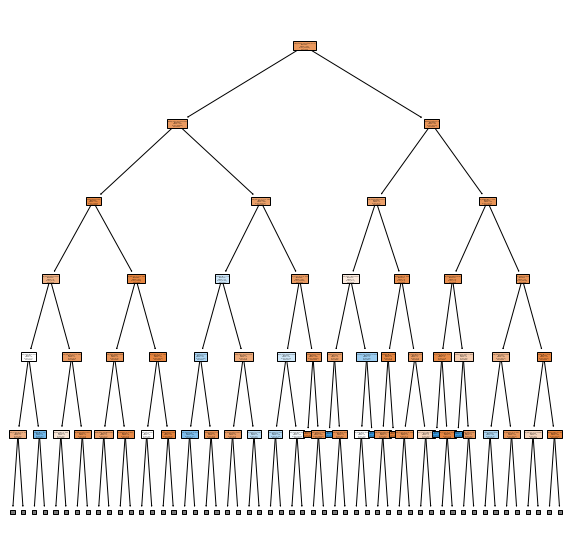

In [27]:
dec_tree_model_final = DecisionTreeClassifier(max_depth=31, max_features='sqrt', min_weight_fraction_leaf=0.0)
dec_tree_model_final.fit(x_train_lof, y_train_lof)
y_pred_final: np.ndarray = dec_tree_model_final.predict(x_test_norm)

bank_customers_features: list = list(bank_customers_clean.columns)
del bank_customers_features[0:2]
plt.figure(figsize=(10,10))
tree.plot_tree(dec_tree_model_final, feature_names=bank_customers_features,
               class_names=['False', 'True'], filled=True, max_depth=5)

Here are our feature weights. The higher the number, the more important a feature is in  
determining whether the customer is active or no longer banking.

In [28]:
feature_weights: np.ndarray = dec_tree_model_final.feature_importances_
feature_importance: dict = dict(zip(bank_customers_features,feature_weights))
feature_importance

{'Customer_Age': 0.027008265553910244,
 'Dependent_count': 0.013202619186705313,
 'Months_on_book': 0.040322078322032225,
 'Total_Relationship_Count': 0.0533625503198391,
 'Months_Inactive_12_mon': 0.033382099725403014,
 'Contacts_Count_12_mon': 0.021020320254726867,
 'Credit_Limit': 0.05215181526786576,
 'Total_Revolving_Bal': 0.04825736556856084,
 'Avg_Open_To_Buy': 0.023573158065641853,
 'Total_Amt_Chng_Q4_Q1': 0.09288625627352305,
 'Total_Trans_Amt': 0.11422049273119372,
 'Total_Trans_Ct': 0.16458570228245142,
 'Total_Ct_Chng_Q4_Q1': 0.1608579202784604,
 'Avg_Utilization_Ratio': 0.0718918936818965,
 'Gender_F': 0.001421120733401687,
 'Gender_M': 0.00650791644196727,
 'Education_Level_bachelor': 0.005121544179050374,
 'Education_Level_graduate': 0.0066561344299178715,
 'Education_Level_high school': 0.005016085373573927,
 'Education_Level_uneducated': 0.006428950400750781,
 'Marital_Status_Divorced': 0.0021697843176778876,
 'Marital_Status_Married': 0.010098974956407974,
 'Marital_S

# -----------------------------------

## Analysi and Conclusion

Overall, our decision tree model has done an alright job at classifying which customer are  
active and which ones have left. Our balanced accuracy score was around 83%, which is fairly  
good considering the great disbalance our data had. If we were to perform a downsampling on  
active customers, to level the playing field in terms of numbers with non-active customers,  
we might have gotten better results. Additionally, if given more time, we could have performed  
a stringent feature selection process which would eliminate the weak variables and likely  
simplify our model. After all, the simpler the model the better. Additionally, we could have  
compared our decision tree model with a logistic regression model or a k-means clustering model  
as alternatives.

All in all, we can make several conclusions from our classification model. First, the bank  
should look into the relationship between a customer's bank lifespan and the likelyhood they  
stay active. There is even, possibly, a positive relationship between lifespan and total 
transactions. If that is the case, the bank should prioritize extending a customer's lifespan  
with them. It would also make sense for the bank to dive deeper into their card categories.  
As will be evident below, card category feature is not very important. It may be that the bank  
ought to remake these card categories.

#### Quick feature analysis

As we can see below, our most important feature is 'Total_Trans_Ct'.  
This is rather logical since active customers should make more transactions  
than non-active ones. 

In [29]:
max(feature_importance, key=feature_importance.get)

'Total_Trans_Ct'

Now, let's examine the ranking of feature importance.

In [30]:
sorted(feature_importance, key=feature_importance.get, reverse=True)

['Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Amt_Chng_Q4_Q1',
 'Avg_Utilization_Ratio',
 'Total_Relationship_Count',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Months_on_book',
 'Months_Inactive_12_mon',
 'Customer_Age',
 'Avg_Open_To_Buy',
 'Contacts_Count_12_mon',
 'Marital_Status_Single',
 'Dependent_count',
 'Marital_Status_Married',
 'Education_Level_graduate',
 'Gender_M',
 'Education_Level_uneducated',
 'Education_Level_bachelor',
 'Education_Level_high school',
 'Marital_Status_Unknown',
 'Income_Category_inUSD_80to120K',
 'Income_Category_inUSD_less_than_40K',
 'Income_Category_inUSD_more_than_120K',
 'Card_Category_Silver',
 'Marital_Status_Divorced',
 'Card_Category_Blue',
 'Gender_F',
 'Card_Category_Gold',
 'Income_Category_inUSD_60to80K',
 'Income_Category_inUSD_40to60K',
 'Card_Category_Platinum']

We can see that our card category features, some education level ones, and income category features are  
not very important to the model. On the other hand, the change in transactions count is very influential  
in our model. Same with the utilization ratio. All of this makes sense.  
It also must be noted the amount of bank products used is very important. It may be that the more products  
a customer has, the more likely they are to remain a customer. Similarly, it may very well be that the  
longer a customer spends with the bank, they more likely they are to remain an active customer.